<h1> Task</h1>

<h1> Car Evaluation practice assignment with decision tree classifier

<h1> Import the Libraries</h1>

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
#from fast_ml.model_development import train_valid_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import imblearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.pipeline import make_pipeline
from numpy import std
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve,auc, roc_curve
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import sys
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy
from sklearn.model_selection import cross_val_predict
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import plot_tree, export_text
from sklearn.tree import export_graphviz

# Load the data

In [107]:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.data')

data_class = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.names',sep='\t')
data_attributes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.c45-names',sep='\t')

In [108]:
data_class

,1. Title: Car Evaluation Database
0,2. Sources:
1,(a) Creator: Marko Bohanec
2,(b) Donors: Marko Bohanec (marko.bohanec@...
3,Blaz Zupan (blaz.zupan@ijs...
4,"(c) Date: June, 1997"
...,...
57,-----------------------------
58,unacc 1210 (70.023 %)
59,acc 384 (22.222 %)
60,good 69 ( 3.993 %)


In [109]:
data_attributes

,| names file (C4.5 format) for car evaluation domain
0,| class values
1,"unacc, acc, good, vgood"
2,| attributes
3,"buying: vhigh, high, med, low."
4,"maint: vhigh, high, med, low."
5,"doors: 2, 3, 4, 5more."
6,"persons: 2, 4, more."
7,"lug_boot: small, med, big."
8,"safety: low, med, high."


In [110]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


<h1> Feature Engineering</h1>

In [111]:
# Rename the column
data.columns =  ['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data['class'] = data['class'].replace({'unacc':'unaccepted','acc':'accepted','vgood':'very good'})
                              


<h1> Descriptive Statistics</h1>

In [112]:
data.describe(include='all')

,buying,meant,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unaccepted
freq,432,432,432,576,576,576,1209


<h1> Check for missing value</h1>

In [113]:
data.isna().sum()

buying      0
meant       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

<h1> Data Information</h1>

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   meant     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<h1> Count value frequency</h1>

In [115]:
for col in data:
    print(data[col].value_counts())
    

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: meant, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unaccepted    1209
accepted       384
good            69
very good       65
Name: class, dtype: int64


<h1> Count class frequency</h1>

In [116]:
data['class'].value_counts()

unaccepted    1209
accepted       384
good            69
very good       65
Name: class, dtype: int64

There are four classes in the target column

<h1> Seperate features from target class</h1>

In [117]:
X = data.drop('class',axis=1)
y = data['class']
X.head(5)


,buying,meant,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [118]:
y.head(5)

0    unaccepted
1    unaccepted
2    unaccepted
3    unaccepted
4    unaccepted
Name: class, dtype: object

In [119]:
X['persons'].value_counts()

4       576
more    576
2       575
Name: persons, dtype: int64

In [120]:
d = X[X['doors'] == '5more']
p = X[X['persons'] == 'more']

print(d,'--------------------------')
print(p)

     buying  meant  doors persons lug_boot safety
80    vhigh  vhigh  5more       2    small    low
81    vhigh  vhigh  5more       2    small    med
82    vhigh  vhigh  5more       2    small   high
83    vhigh  vhigh  5more       2      med    low
84    vhigh  vhigh  5more       2      med    med
...     ...    ...    ...     ...      ...    ...
1722    low    low  5more    more      med    med
1723    low    low  5more    more      med   high
1724    low    low  5more    more      big    low
1725    low    low  5more    more      big    med
1726    low    low  5more    more      big   high

[432 rows x 6 columns] --------------------------
     buying  meant  doors persons lug_boot safety
17    vhigh  vhigh      2    more    small    low
18    vhigh  vhigh      2    more    small    med
19    vhigh  vhigh      2    more    small   high
20    vhigh  vhigh      2    more      med    low
21    vhigh  vhigh      2    more      med    med
...     ...    ...    ...     ...      ...    ...

In [121]:
X['doors'] = X.doors.replace('5more',5)

In [122]:
# get the percentage of the persons features
per = X['persons'].values
per = p[p == 'more']
total_p = (len(per))
to_per = total_p/100
print(round(to_per,0))

6.0


<h1> Replace value with proportion</h1>

In [123]:
X['persons'] = X['persons'].replace('more',6)

In [124]:
X.head(5)

,buying,meant,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


<h1> Check to see if classes are balance or not</h1>

Counter({'unaccepted': 1209, 'accepted': 384, 'good': 69, 'very good': 65})


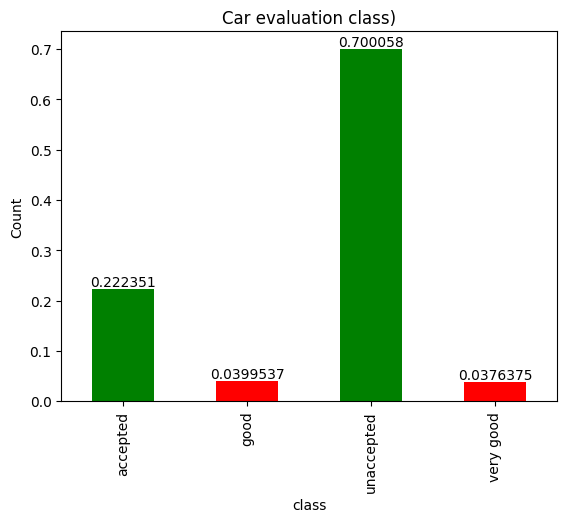

In [125]:
frequency = pd.Series(y.value_counts(normalize=True).sort_index())
fig = frequency.plot.bar()
fig = frequency.plot(kind ='bar',color=['green','red'])
fig.bar_label(fig.containers[0])
plt.title('Car evaluation class)')
plt.ylabel('Count')
plt.xlabel('class')

# summarize class distribution
counter = Counter(y)
print(counter)

<h1> Transform data into ordinal category</h1>

In [126]:
cols=['persons', 'lug_boot', 'safety']
# Encode Categorical
oe = OrdinalEncoder()
le = LabelEncoder()
X[['buying', 'meant', 'lug_boot', 'safety']]  = oe.fit_transform(data[['buying', 'meant', 'lug_boot', 'safety']])
X = pd.DataFrame(X)
X.columns = ['persons','buying', 'doors','meant', 'lug_boot', 'safety']
X = X.astype('float64').copy()

y = le.fit_transform(y)
y = pd.DataFrame(y)

In [127]:
features = X.columns
features

Index(['persons', 'buying', 'doors', 'meant', 'lug_boot', 'safety'], dtype='object')

In [128]:
X = X.values
y = y.values
X_new = X
y_new = y

In [129]:
y = y.astype('int64')

<h1> Split data into training and testing set</h1>

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<h1> Normalize data</h1>

In [131]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<h1> View data shape</h1>

In [132]:
print("X_train shape is ",X_train.shape," and X_test shape is ", X_test.shape)
print("y_train shape is",y_train.shape, "and y_test shape is", y_test.shape)

X_train shape is  (1381, 6)  and X_test shape is  (346, 6)
y_train shape is (1381, 1) and y_test shape is (346, 1)


<h1> Model Selection </h1>

In [133]:
tree_clf = DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=3)

<h1> Train the Model</h1>

In [134]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

<h1> Visualizing the decision tree</h1>

[Text(0.375, 0.875, 'meant <= -0.618\ngini = 0.75\nsamples = 1381\nvalue = [345.25, 345.25, 345.25, 345.25]\nclass = unaccepted'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 458\nvalue = [0.0, 0.0, 162.68, 0.0]\nclass = good'),
 Text(0.5, 0.625, 'safety <= -0.622\ngini = 0.737\nsamples = 923\nvalue = [345.25, 345.25, 182.57, 345.25]\nclass = unaccepted'),
 Text(0.25, 0.375, 'lug_boot <= 0.605\ngini = 0.635\nsamples = 302\nvalue = [185.558, 127.87, 24.508, 345.25]\nclass = very good'),
 Text(0.125, 0.125, 'gini = 0.459\nsamples = 195\nvalue = [120.331, 19.181, 13.142, 345.25]\nclass = very good'),
 Text(0.375, 0.125, 'gini = 0.528\nsamples = 107\nvalue = [65.226, 108.69, 11.366, 0.0]\nclass = accepted'),
 Text(0.75, 0.375, 'safety <= 0.607\ngini = 0.659\nsamples = 621\nvalue = [159.692, 217.38, 158.062, 0.0]\nclass = accepted'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 308\nvalue = [0.0, 0.0, 109.4, 0.0]\nclass = good'),
 Text(0.875, 0.125, 'gini = 0.586\nsamples = 313\nvalue = [159.69

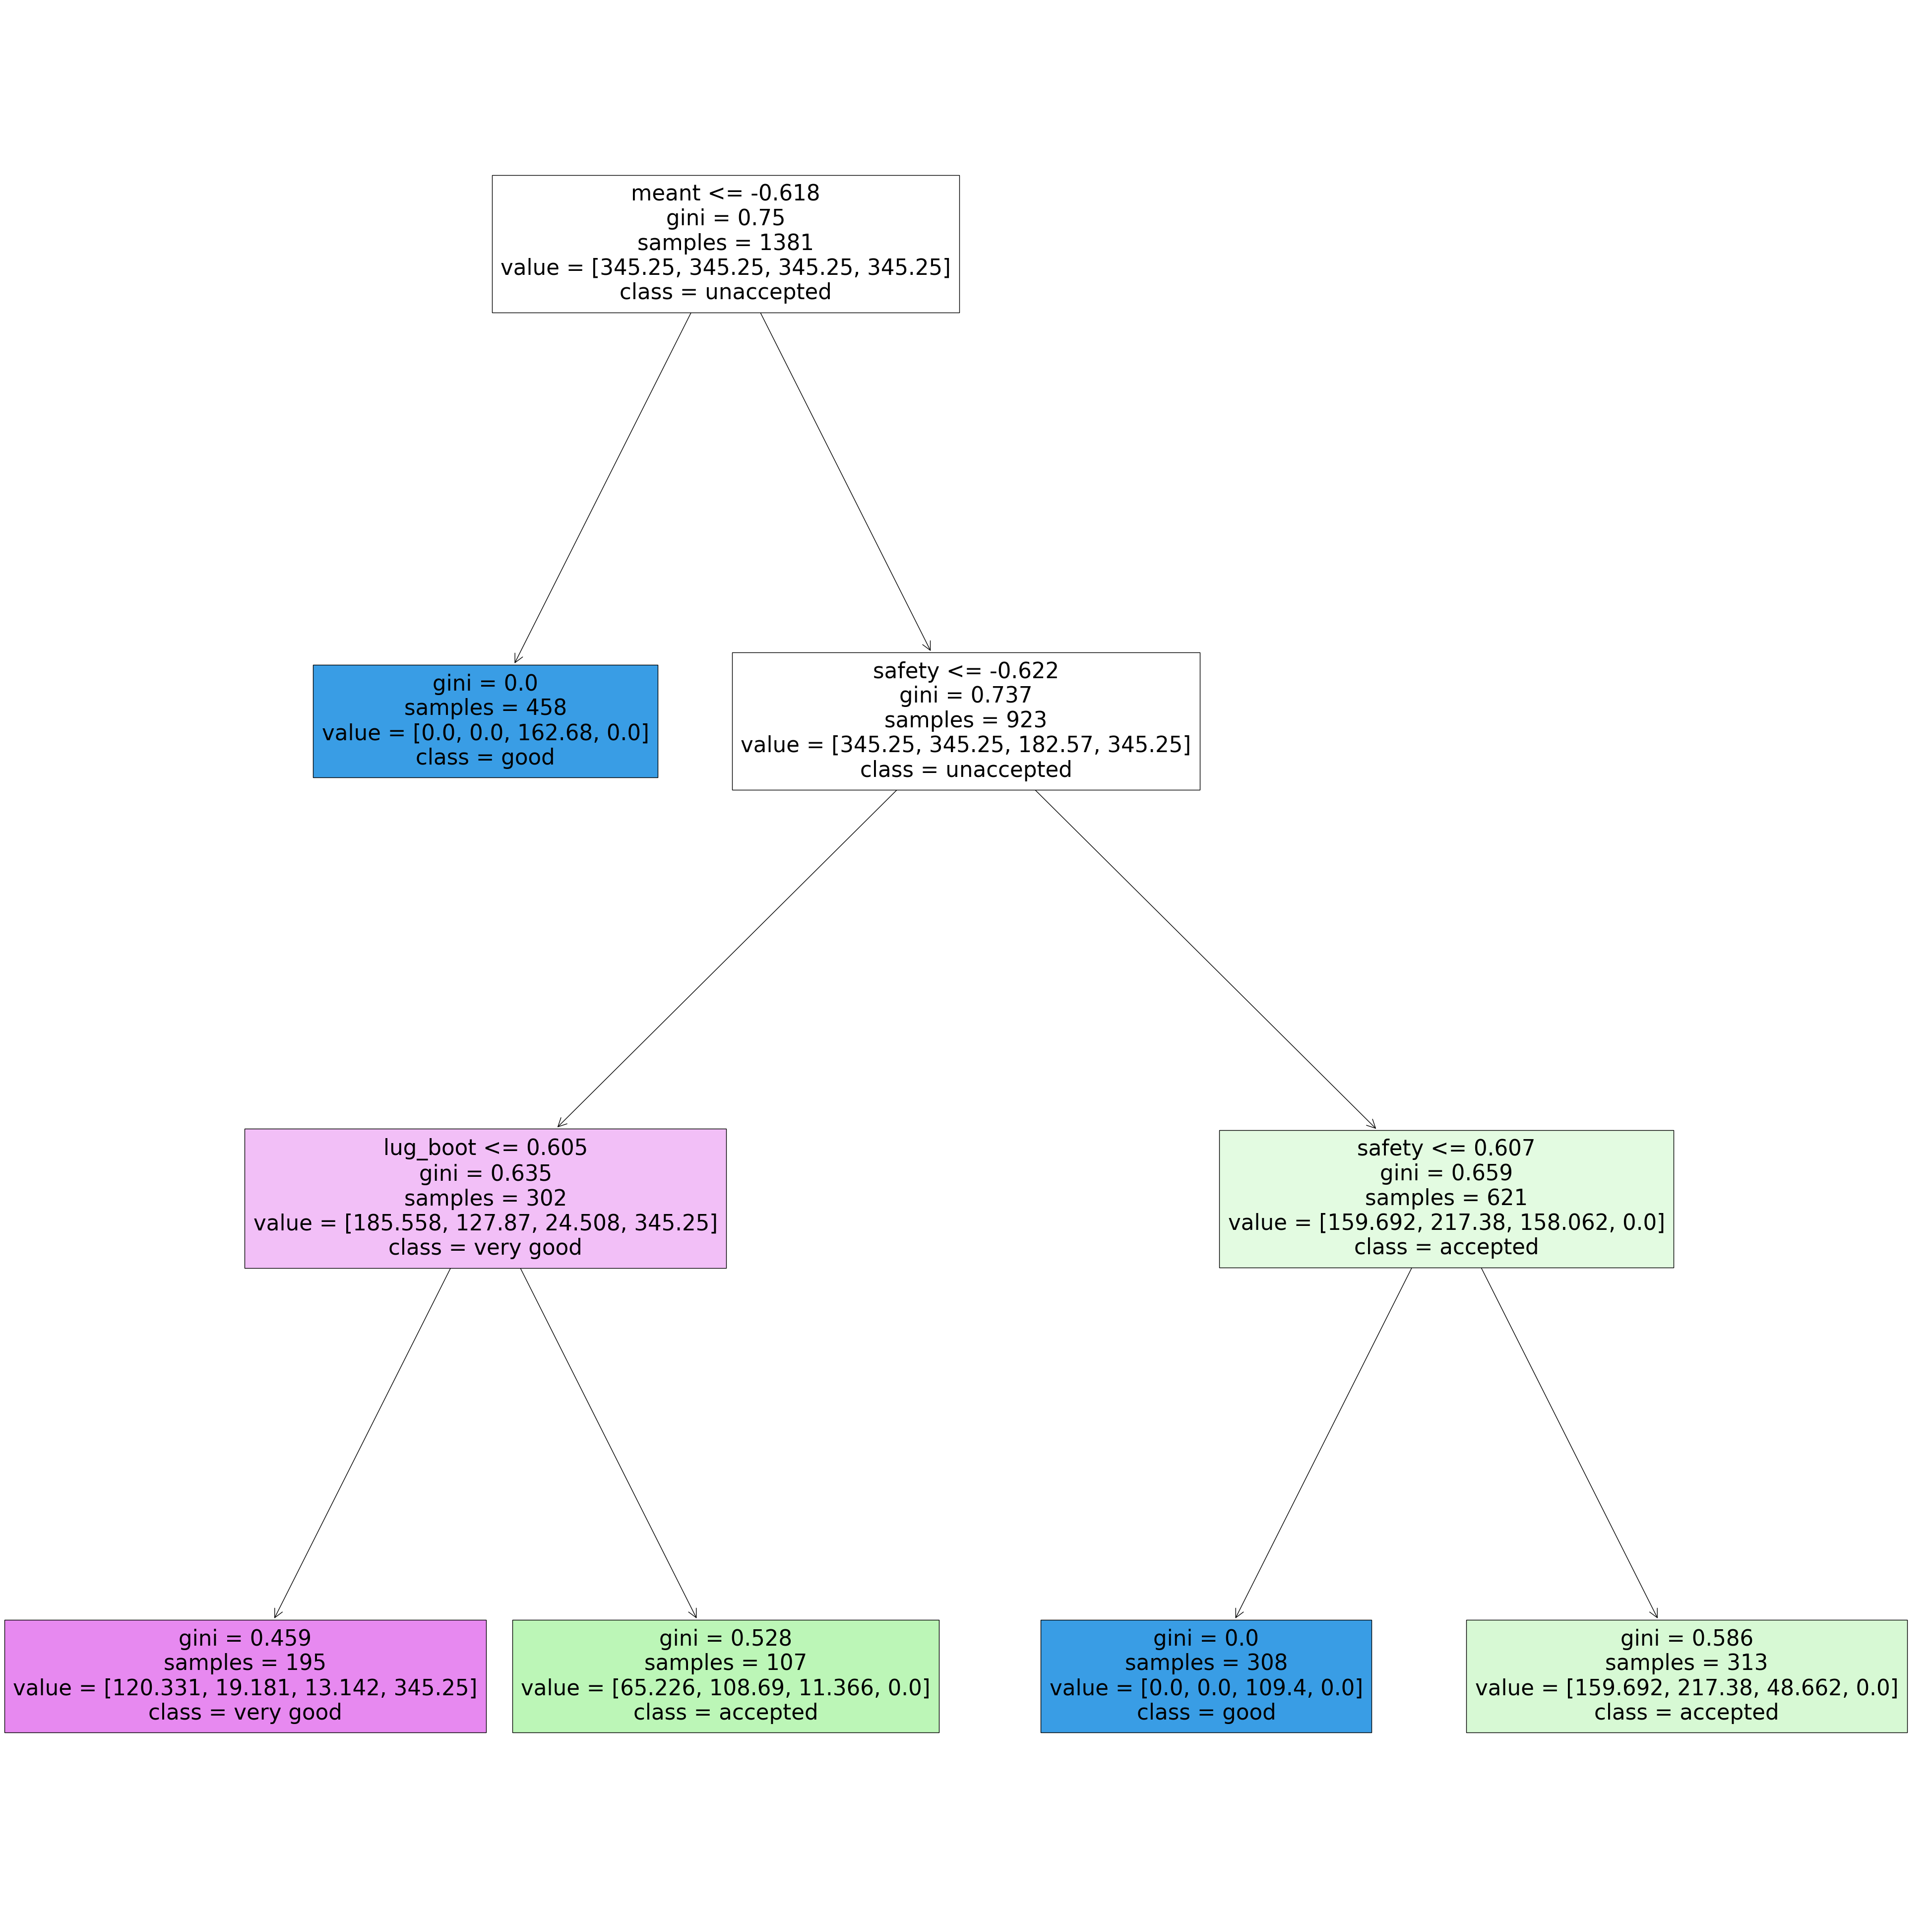

In [135]:
class_names = ['unaccepted','accepted','good','very good']
plt.figure(figsize=(50,50))
plot_tree(tree_clf,feature_names=features,class_names = class_names,filled=True)

<h1> Make Prediction from the testing and the training set</h1>

In [136]:
y_test_pred = tree_clf.predict(X_test)
y_train_pred = tree_clf.predict(X_train)
Counter(y_train_pred)

Counter({2: 766, 1: 420, 3: 195})

<h1> Evaluating, Overfitting, and Regularization</h1>

<ul><li><h3> Evaluation for training data</h3></li></ul>

In [137]:
print("Accuracy score for the training set predictions: {0:0.2f}".format(accuracy_score(y_train,y_train_pred)))
print("Accuracy score for the training set predictions: {0:0.2f}".format(tree_clf.score(X_train,y_train)))

Accuracy score for the training set predictions: 0.63
Accuracy score for the training set predictions: 0.63


<ul><li><h3> Evaluation for testing data</h3></li></ul>

In [138]:

print("Accuracy score for the testing set predictions: {0:0.2f}".format(accuracy_score(y_test,y_test_pred)))
print("Accuracy score for the testing set predictions: {0:0.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy score for the testing set predictions: 0.63
Accuracy score for the testing set predictions: 0.63


In [139]:
tree_clf.tree_.max_depth

3

In [140]:
target = pd.DataFrame(y_test)
target.value_counts()/len(target)

2    0.684971
0    0.222543
3    0.049133
1    0.043353
dtype: float64

62% and 64% accuracy was achieved for both the training and the testing with a max depth of 3. Although, the accuracy is poor but let see how we can find the best parameter for the model

<h1> Hyperparameter tuning</h1>

<h2> <li>Finding the Ideal depth for our model</li></h2>

Since we are not sure what depth our ideal would have, we can run a for loop range number between  1-21 to find out

In [141]:
for max_depth in range(1,21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    print("The training accuracy for max_depth {} is".format(max_depth), model.score(X_train,y_train))
    print("The training accuracy for max_depth {} is".format(max_depth), model.score(X_train,y_train))

The training accuracy for max_depth 1 is 0.7038377986965967
The training accuracy for max_depth 1 is 0.7038377986965967
The training accuracy for max_depth 2 is 0.7733526430123099
The training accuracy for max_depth 2 is 0.7733526430123099
The training accuracy for max_depth 3 is 0.779145546705286
The training accuracy for max_depth 3 is 0.779145546705286
The training accuracy for max_depth 4 is 0.8269370021723389
The training accuracy for max_depth 4 is 0.8269370021723389
The training accuracy for max_depth 5 is 0.8624185372918175
The training accuracy for max_depth 5 is 0.8624185372918175
The training accuracy for max_depth 6 is 0.8921071687183201
The training accuracy for max_depth 6 is 0.8921071687183201
The training accuracy for max_depth 7 is 0.9326574945691528
The training accuracy for max_depth 7 is 0.9326574945691528
The training accuracy for max_depth 8 is 0.9522085445329471
The training accuracy for max_depth 8 is 0.9522085445329471
The training accuracy for max_depth 9 is 0

As we can see, the pertinent depth here is 10

<h1>Hyper tuning decision tree parameter with grid search</h1>

In [142]:
params = {'max_depth': [2,3,5,8,10,20],
          'min_samples_leaf': [6,10,20,50,100],
          'criterion': ['gini','entropy']}

tree_cls = DecisionTreeClassifier()
# instantiate the grid search model
grid_search = GridSearchCV(estimator=tree_clf,param_grid=params, cv=4, n_jobs=-1, verbose=1,scoring='accuracy')

<h1> fit in the training examples</h1>

In [143]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: user 237 ms, sys: 62.3 ms, total: 299 ms
Wall time: 2.41 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10, 20],
                         'min_samples_leaf': [6, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

<h1> Evaluate performance</h1>

In [144]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003175,0.000399,0.001100,0.000118,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.404624,0.397101,0.365217,0.397101,0.391011,0.015205,56
1,0.003540,0.000975,0.001636,0.001111,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.404624,0.397101,0.365217,0.397101,0.391011,0.015205,56
2,0.003819,0.001568,0.001060,0.000135,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.404624,0.397101,0.365217,0.397101,0.391011,0.015205,56
3,0.003041,0.000357,0.001046,0.000202,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.404624,0.397101,0.365217,0.397101,0.391011,0.015205,56
4,0.003367,0.001374,0.000902,0.000090,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.404624,0.397101,0.365217,0.397101,0.391011,0.015205,56


<h1> Get the top 5 mean test score</h1>

In [145]:
score_df.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
50,0.004842,0.001731,0.003401,0.004191,entropy,10,6,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.933526,0.936232,0.904348,0.898551,0.918164,0.016867,1
55,0.007107,0.002512,0.001037,0.000077,entropy,20,6,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.933526,0.936232,0.904348,0.898551,0.918164,0.016867,1
20,0.007999,0.001387,0.002362,0.001331,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.942197,0.924638,0.904348,0.898551,0.917433,0.017269,3
25,0.008870,0.002133,0.003569,0.002416,gini,20,6,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.942197,0.924638,0.904348,0.898551,0.917433,0.017269,3
45,0.005987,0.002828,0.000895,0.000085,entropy,8,6,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.924855,0.924638,0.884058,0.889855,0.905852,0.019006,5


In [146]:
# get the best estimation
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=6, random_state=42)

The best estimator shows a max_depth of 10, min sample leaf of 6 with entropy and gini parameters

In [147]:
def evaluate_model(tree_cls):
    print("Train Accuracy :", accuracy_score(y_train,tree_clf.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, tree_clf.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test,tree_clf.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test,tree_clf.predict(X_test)))

In [148]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = plot_tree(dt_classifier,
    feature_names=features,
    class_names= features,
                       filled=True)

In [149]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=6, random_state=42)

In [150]:
grid_search.best_score_

0.9181641115858256

In [151]:
evaluate_model(dt_best)

Train Accuracy : 0.6263577118030412
Train Confusion Matrix:
[[  0 200   0 107]
 [  0  51   0   3]
 [  0 169 766  37]
 [  0   0   0  48]]
--------------------------------------------------
Test Accuracy : 0.6329479768786127
Test Confusion Matrix:
[[  0  50   0  27]
 [  0   9   0   6]
 [  0  33 193  11]
 [  0   0   0  17]]


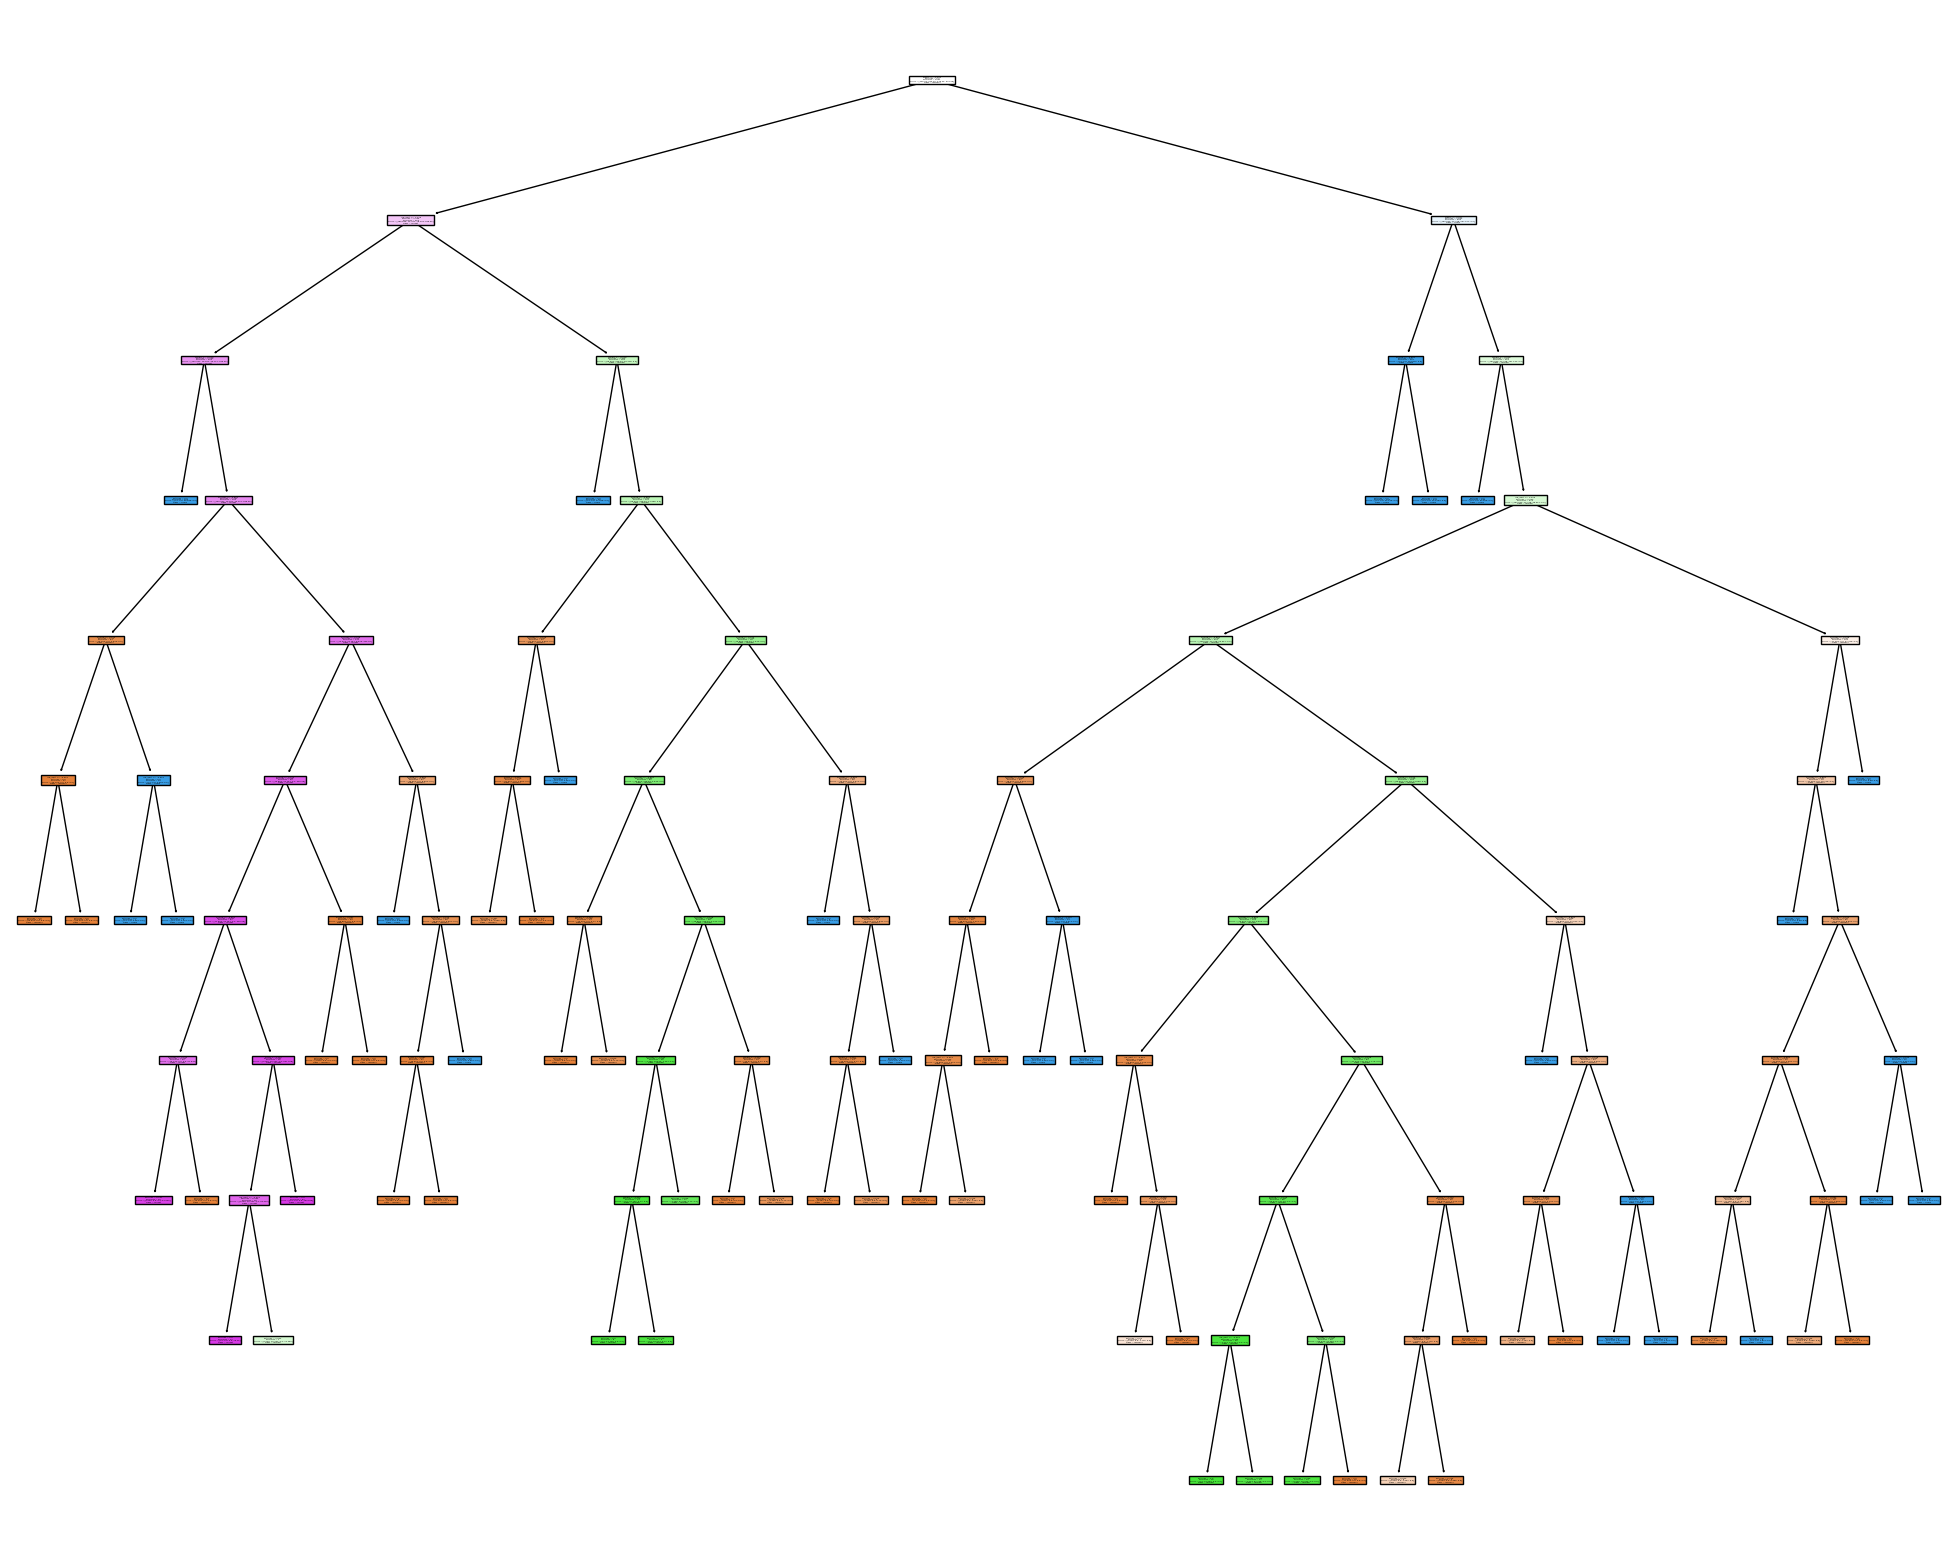

In [152]:
get_dt_graph(dt_best)

Wit grid search hyperparameter tuning, we achieved best score of 92% at max_depth 10. This result is accepted unlike the previous one which 64% and 62% for both testing and training set.We used two hypertuning parameters for this boosting; namely gini and entropy.